In [1]:
import starepandas
import matplotlib.pyplot as plt

In [2]:
vnp03_name = '../tests/data/granules/VNP03DNB.A2020219.0742.001.2020219124651.nc'

In [3]:
# Option 1: bootstrap
#df = starepandas.read_granule(vnp03_name)

In [4]:
# Option 2: read sidecar
#df = starepandas.read_granule(vnp03_name, sidecar=True)

In [5]:
# Option 3: Manual
vnp03 = starepandas.io.granules.VNP03DNB(vnp03_name)
vnp03.read_latlon()
vnp03.read_data()
vnp03 = vnp03.to_df()

# VNP02

In [6]:
vnp02_name = '../tests/data/granules/VNP02DNB.A2020219.0742.001.2020219125654.nc'
vnp02 = starepandas.read_granule(vnp02_name, sidecar=False, read_latlon=False)

In [7]:
vnp02 = vnp03.join(vnp02)

In [8]:
vnp02[(vnp02.land_water_mask==2) | (vnp02.land_water_mask==4) | (vnp02.land_water_mask==6) | (vnp02.land_water_mask==7)]

,lat,lon,moon_illumination_fraction,land_water_mask,quality_flag,DNB_observations,DNB_quality_flags
267,41.680256,-102.596710,92.790001,2,0,3.503916e-09,16
368,41.663277,-101.661072,92.799995,2,0,6.539059e-09,16
369,41.663055,-101.652069,92.799995,2,0,7.083299e-09,16
403,41.654938,-101.342972,92.799995,2,0,8.231430e-09,16
883,41.460007,-96.951828,92.820000,2,0,2.414932e-09,16
...,...,...,...,...,...,...,...
13134843,16.577330,-78.576134,92.879997,7,0,2.087984e-09,0
13134844,16.575632,-78.569000,92.879997,7,0,1.579183e-09,0
13134845,16.573931,-78.561844,92.879997,7,0,1.579183e-09,0
13134846,16.572226,-78.554688,92.879997,7,0,2.393264e-09,0


# CLDMSK

In [9]:
cldmsk_name = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'

In [10]:
cldmsk = starepandas.io.granules.CLDMSK_L2_VIIRS(cldmsk_name)

In [11]:
cldmsk.read_latlon()
cldmsk.read_data()
cldmsk.to_df()

,lat,lon,Integer_Cloud_Mask
0,41.747662,-104.969498,3
1,41.747696,-104.950218,3
2,41.747730,-104.930237,3
3,41.747761,-104.910843,3
4,41.747784,-104.891747,3
...,...,...,...
10342395,16.522247,-78.595093,2
10342396,16.518646,-78.580162,1
10342397,16.515034,-78.565208,0
10342398,16.511414,-78.550224,1


# Plotting

In [13]:
path = '../tests/data/granules/VNP03DNB.A2020219.0742.001.2020219124651.nc'
vnp03dnb = starepandas.io.granules.VIIRS_L2(path)
vnp03dnb.read_latlon()

path = '../tests/data/granules/VNP03MOD.A2020219.0742.001.2020219124651.nc'
vnp03mod = starepandas.io.granules.VIIRS_L2(path)
vnp03mod.read_latlon()

path = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'
cldmsk = starepandas.io.granules.VIIRS_L2(path)
cldmsk.read_latlon()

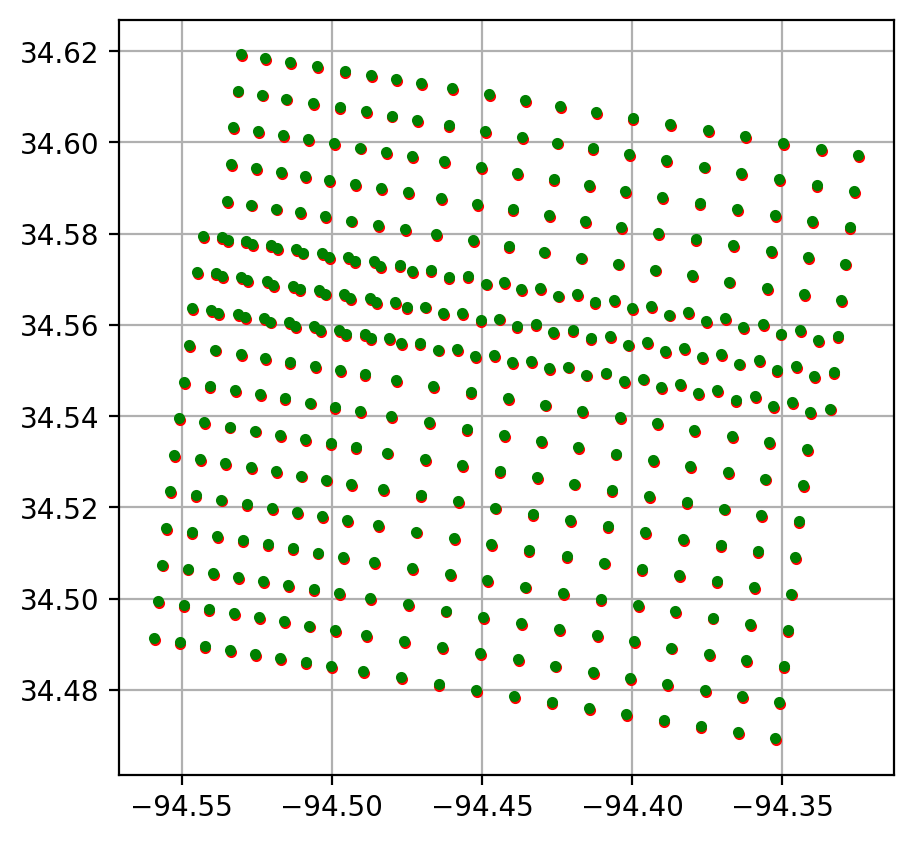

In [17]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

n = 20
ns = 1000
nt = 1000

ax.grid('on')

ax.plot(cldmsk.lon[ns:ns+n, nt:nt+n].flatten(), cldmsk.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='r', lw=0, marker='.')
ax.plot(vnp03mod.lon[ns:ns+n, nt:nt+n].flatten(), vnp03mod.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='g',lw=0, marker='.')

#ax.plot(vnp03dnb.lon[ns:ns+n, nt:nt+n].flatten(), vnp03dnb.lat[ns:ns+n, nt:nt+n].flatten(), 
#        color='b',lw=0, marker='.')